In [106]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split , RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from xgboost import XGBRegressor
from scipy.stats import randint,uniform

In [11]:
df = pd.read_csv('Housing_Price_Data.csv')

In [12]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [15]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [41]:
df.shape

(545, 13)

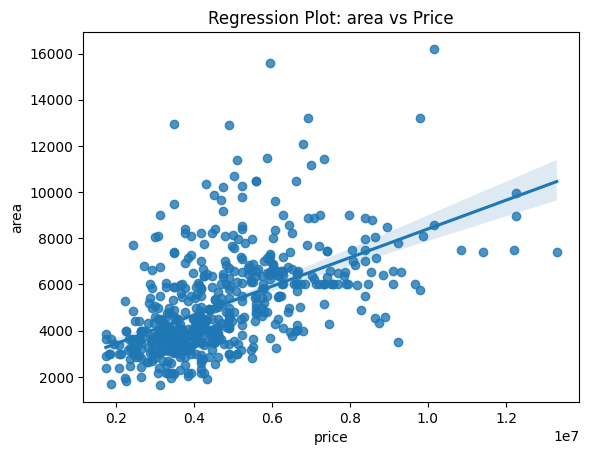

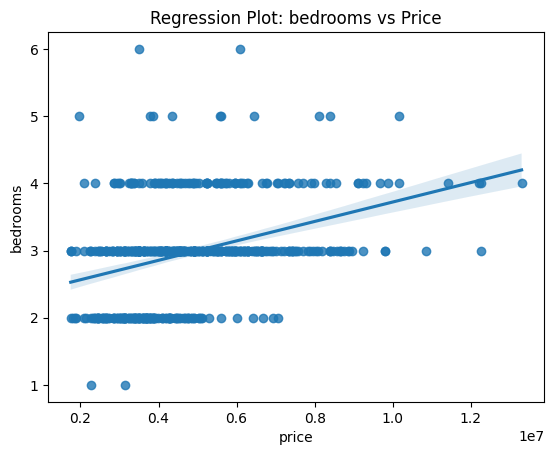

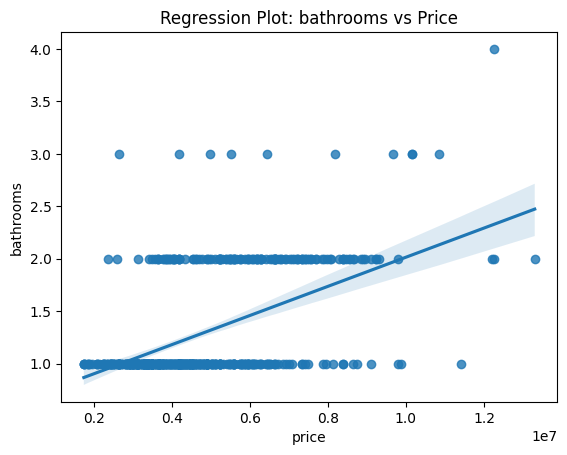

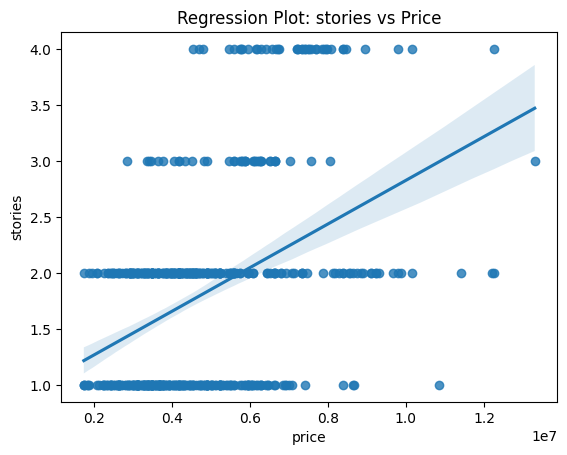

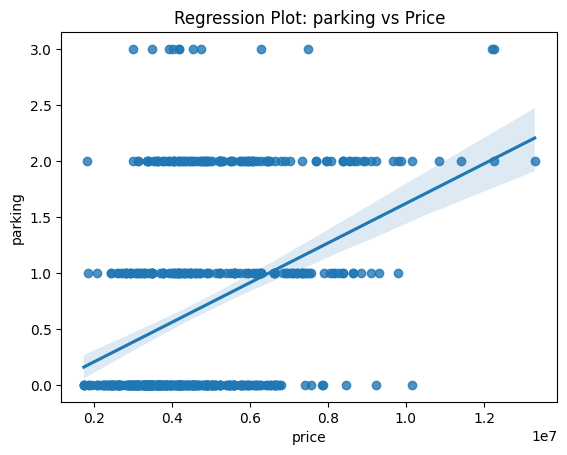

In [20]:


for col in df.columns:
    if df[col].dtypes == "int64" and col != "price":
                plt.figure()
                sns.regplot(x="price", y=col, data=df)
                plt.title(f'Regression Plot: {col} vs Price')
                plt.show()


In [26]:
LE = LabelEncoder()
for col in df.columns:
    if df[col].dtypes =='object':
        df[col]=LE.fit_transform(df[col])
df.head()        

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


<Axes: >

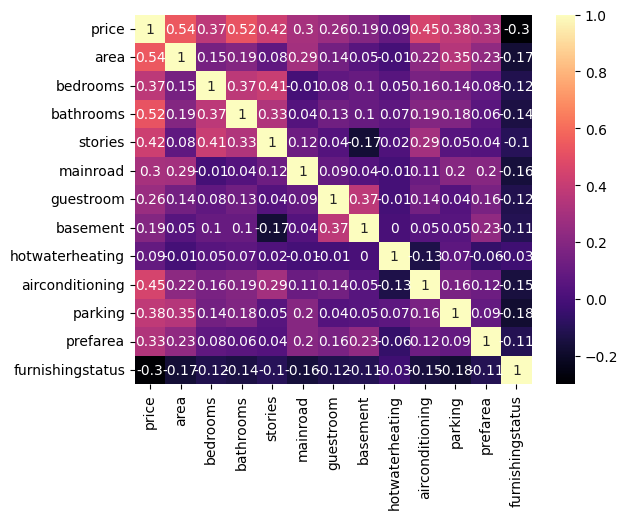

In [31]:
sns.heatmap(round(df.corr(),2),annot=True,cmap="magma")

In [ ]:
SS = StandardScaler()
df

In [39]:
x = df.drop("price",axis=1)
y = df['price']

In [77]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [43]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [78]:
model = RandomForestRegressor(random_state=42)
model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [79]:
prediction = model.predict(x_test)
prediction2=  model.predict(x_train)

In [80]:
print(r2_score(y_train,model.predict(x_train)))

0.9417009191004241


In [81]:
print(r2_score(y_test,prediction))

0.6468262461212793


In [82]:
print("mse:",mean_squared_error(y_test,prediction))
print("mae :",mean_absolute_error(y_test,prediction))

mse: 993011642700.445
mae : 735993.7302752293


In [83]:
model_1 = XGBRegressor()
model_1.fit(x_train,y_train)
prediction_3 = model_1.predict(x_test)

In [63]:
print("mse:",mean_squared_error(y_test,prediction_3))
print("mae :",mean_absolute_error(y_test,prediction_3))
print(r2_score(y_test,prediction_3))

mse: 1458970472722.6685
mae : 804044.0963302752
0.481103777885437


In [85]:
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(2, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
random_search.fit(x_train, y_train)
best_params = random_search.best_params_
print(f"Best hyperparameters: {best_params}")
best_model = random_search.best_estimator_


Best hyperparameters: {'bootstrap': True, 'max_depth': 9, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 77}


c:\Users\ayman\anaconda3\envs\streamlit_env\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
200 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
51 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ayman\anaconda3\envs\streamlit_env\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ayman\anaconda3\envs\streamlit_env\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\ayman\anaconda3\envs\streamlit_env\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    valid

In [86]:
prediction_4 = best_model.predict(x_test)
print('r_2:',r2_score(y_test,prediction_4))

r_2: 0.6430310939059556


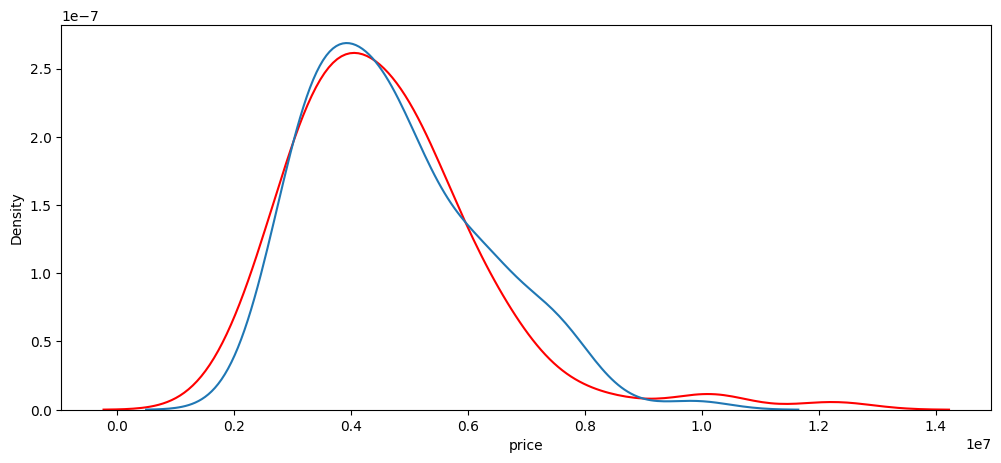

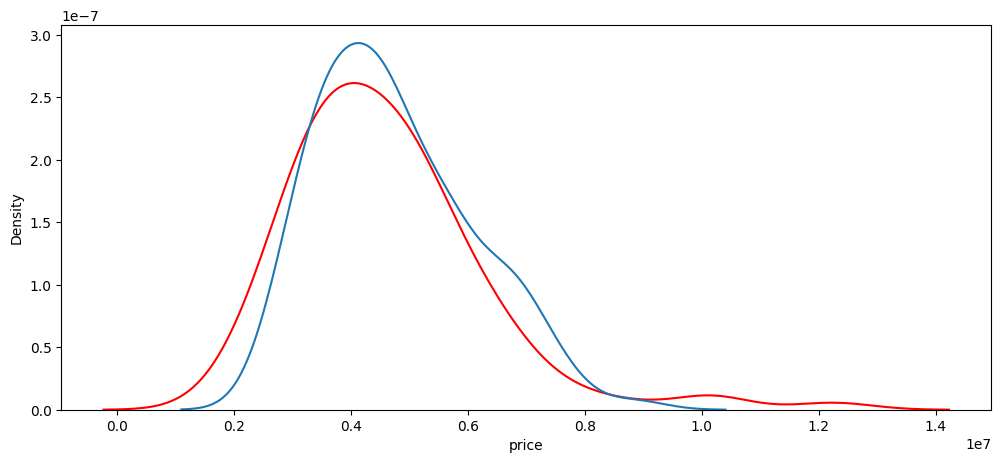

In [105]:
plt.figure(figsize=(12,5))
sns.kdeplot(x=y_test,color='red')
sns.kdeplot(prediction)
plt.show()
plt.figure(figsize=(12,5))
sns.kdeplot(x=y_test,color='red')
sns.kdeplot(prediction_4)

plt.show()

Best hyperparameters: {'colsample_bytree': np.float64(0.5861599356008149), 'gamma': np.float64(0.09614450940433539), 'learning_rate': np.float64(0.030434308133239434), 'max_depth': 6, 'n_estimators': 141, 'reg_alpha': np.float64(0.3476192144826835), 'reg_lambda': np.float64(0.03180468148516513), 'subsample': np.float64(0.7743576546037043)}
Mean Squared Error: 1043458894447.2638


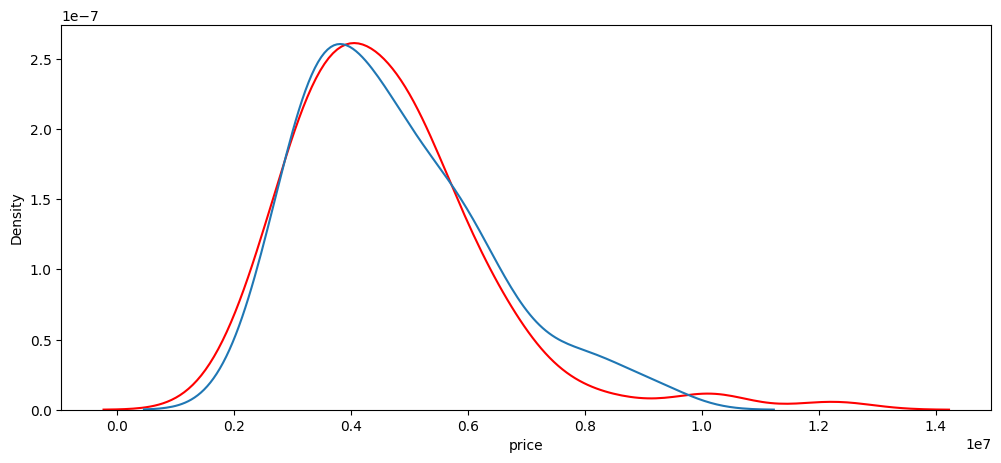

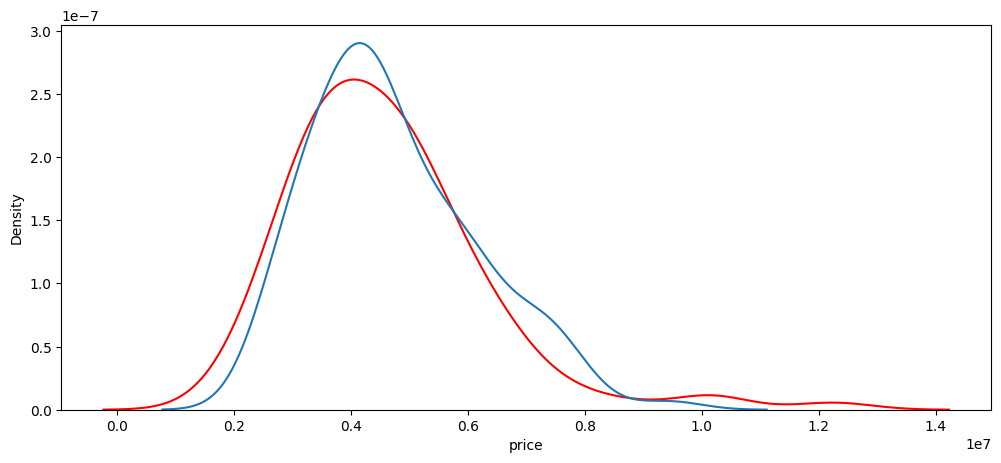

In [108]:
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(2, 20),
    'learning_rate': uniform(0.01, 0.5),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'gamma': uniform(0, 0.5),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}
random_search = RandomizedSearchCV(model_1, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
random_search.fit(x_train, y_train)
best_params = random_search.best_params_
print(f"Best hyperparameters: {best_params}")
best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
plt.figure(figsize=(12,5))
sns.kdeplot(x=y_test,color='red')
sns.kdeplot(prediction_3)
plt.show()
plt.figure(figsize=(12,5))
sns.kdeplot(x=y_test,color='red')
sns.kdeplot(y_pred)

plt.show()







In [109]:
import joblib
joblib.dump(model,'house_price.joblib')
joblib.dump(model_1,'house_price1.joblib')

['house_price1.joblib']

In [110]:
joblib.dump(model,'house_price.joblib')

['house_price.joblib']